# Exploration

## Roadmap

My plan is:
* Visualize the features distribution 
    * Search for: Outliers
    * Search for: Possible high correlations
    * Search for: Anything that might pop-up
* See if there's any missing data
    * Imputation
* Look at correlations

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

![image.png](http://www.sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png)


## Notes

The first part in all my courses through my bachelors and masters, I learned that the best way to approach a new dataset is by visualizing it.

The next best thing is to inquire the expertises on the area, but I think it will be difficult with this dataset.

On a note, I got the dataset [from here](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) and the reference link is [here](https://archive.ics.uci.edu/ml/datasets/wine+quality).

The data is related the time periods of May/2004 to February/2007 

The data is related to red wine only.

The features are:
* Input
    1. fixed acidity   
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates 
    11. alcohol   
* Output variable (based on sensory data):
    12. quality (score between 0 and 10)
    
    

## Todo



In [1]:
# Import libraries

import pandas as pd
import numpy as np

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import dvc.api

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import IsolationForest
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import data

## Create Spark Session

In [3]:
#spark = (SparkSession
#        .builder
#        .appName("Red Wine")
#        .getOrCreate())

## Get DVC url for the data

In [4]:
data_path = dvc.api.get_url('End-to-End Projects/Red Wine Quality/input/winequality-red.csv')

In [5]:
dfInput = pd.read_csv(data_path)

#dfInputS = (spark
#            .read.format("csv")
#            .option("header",True)
#            .load('../input/winequality-red.csv'))

# https://stackoverflow.com/questions/53105033/how-do-i-create-a-seaborn-line-plot-for-pyspark-dataframe

In [6]:
dfInput.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
#dfInputS.head()

First impressions, everything but $free sulfur dioxide$, $total sulfur dioxide$ and $quality$ are features that can take any float value.

In [8]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


And have 1599 observations. Only $quality$ is described as being an integer.   
And from this piece of code, there are no empty/missing values.  
That is perfect.

# Visualization feature by feature


In [9]:
# dfInputS.select(col('quality'))## Distribution: Target - Quality

/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


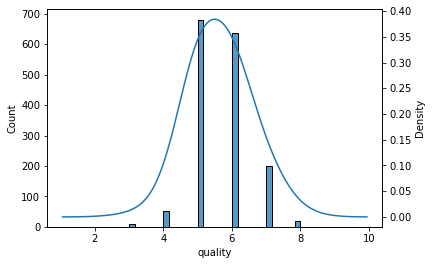

In [10]:
## https://seaborn.pydata.org/generated/seaborn.kdeplot.html
## https://seaborn.pydata.org/generated/seaborn.histplot.html
## Adapted from: 
## https://stackoverflow.com/a/48991009
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.histplot(dfInput['quality'], ax=ax1)
sns.kdeplot(dfInput['quality'], ax=ax2, bw_method=0.8)

In [11]:
dfInput['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Quality follows a normal distribution, with a mean between 5 and 6. The max quality is of 8.  
Yet, it is skewd to the right. I'll keep an eye out if this is a problem in regression/classification.

/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


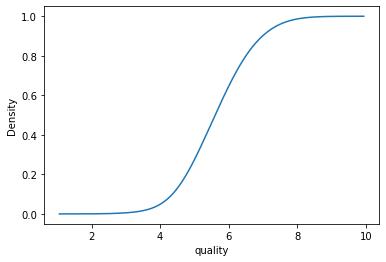

In [12]:
sns.kdeplot(dfInput['quality'], bw_method=0.8, cumulative = True)

## Distribution: Independent features

Since there aren't that many features, I will use the seaborn `pairplot` function and analyse all 11 features at once.

Aid visualizations   
![image.png](https://www.vosesoftware.com/riskwiki/images/M-M0589-A_1.png)   
![image.png](https://i.imgur.com/BdTSZzY.png)


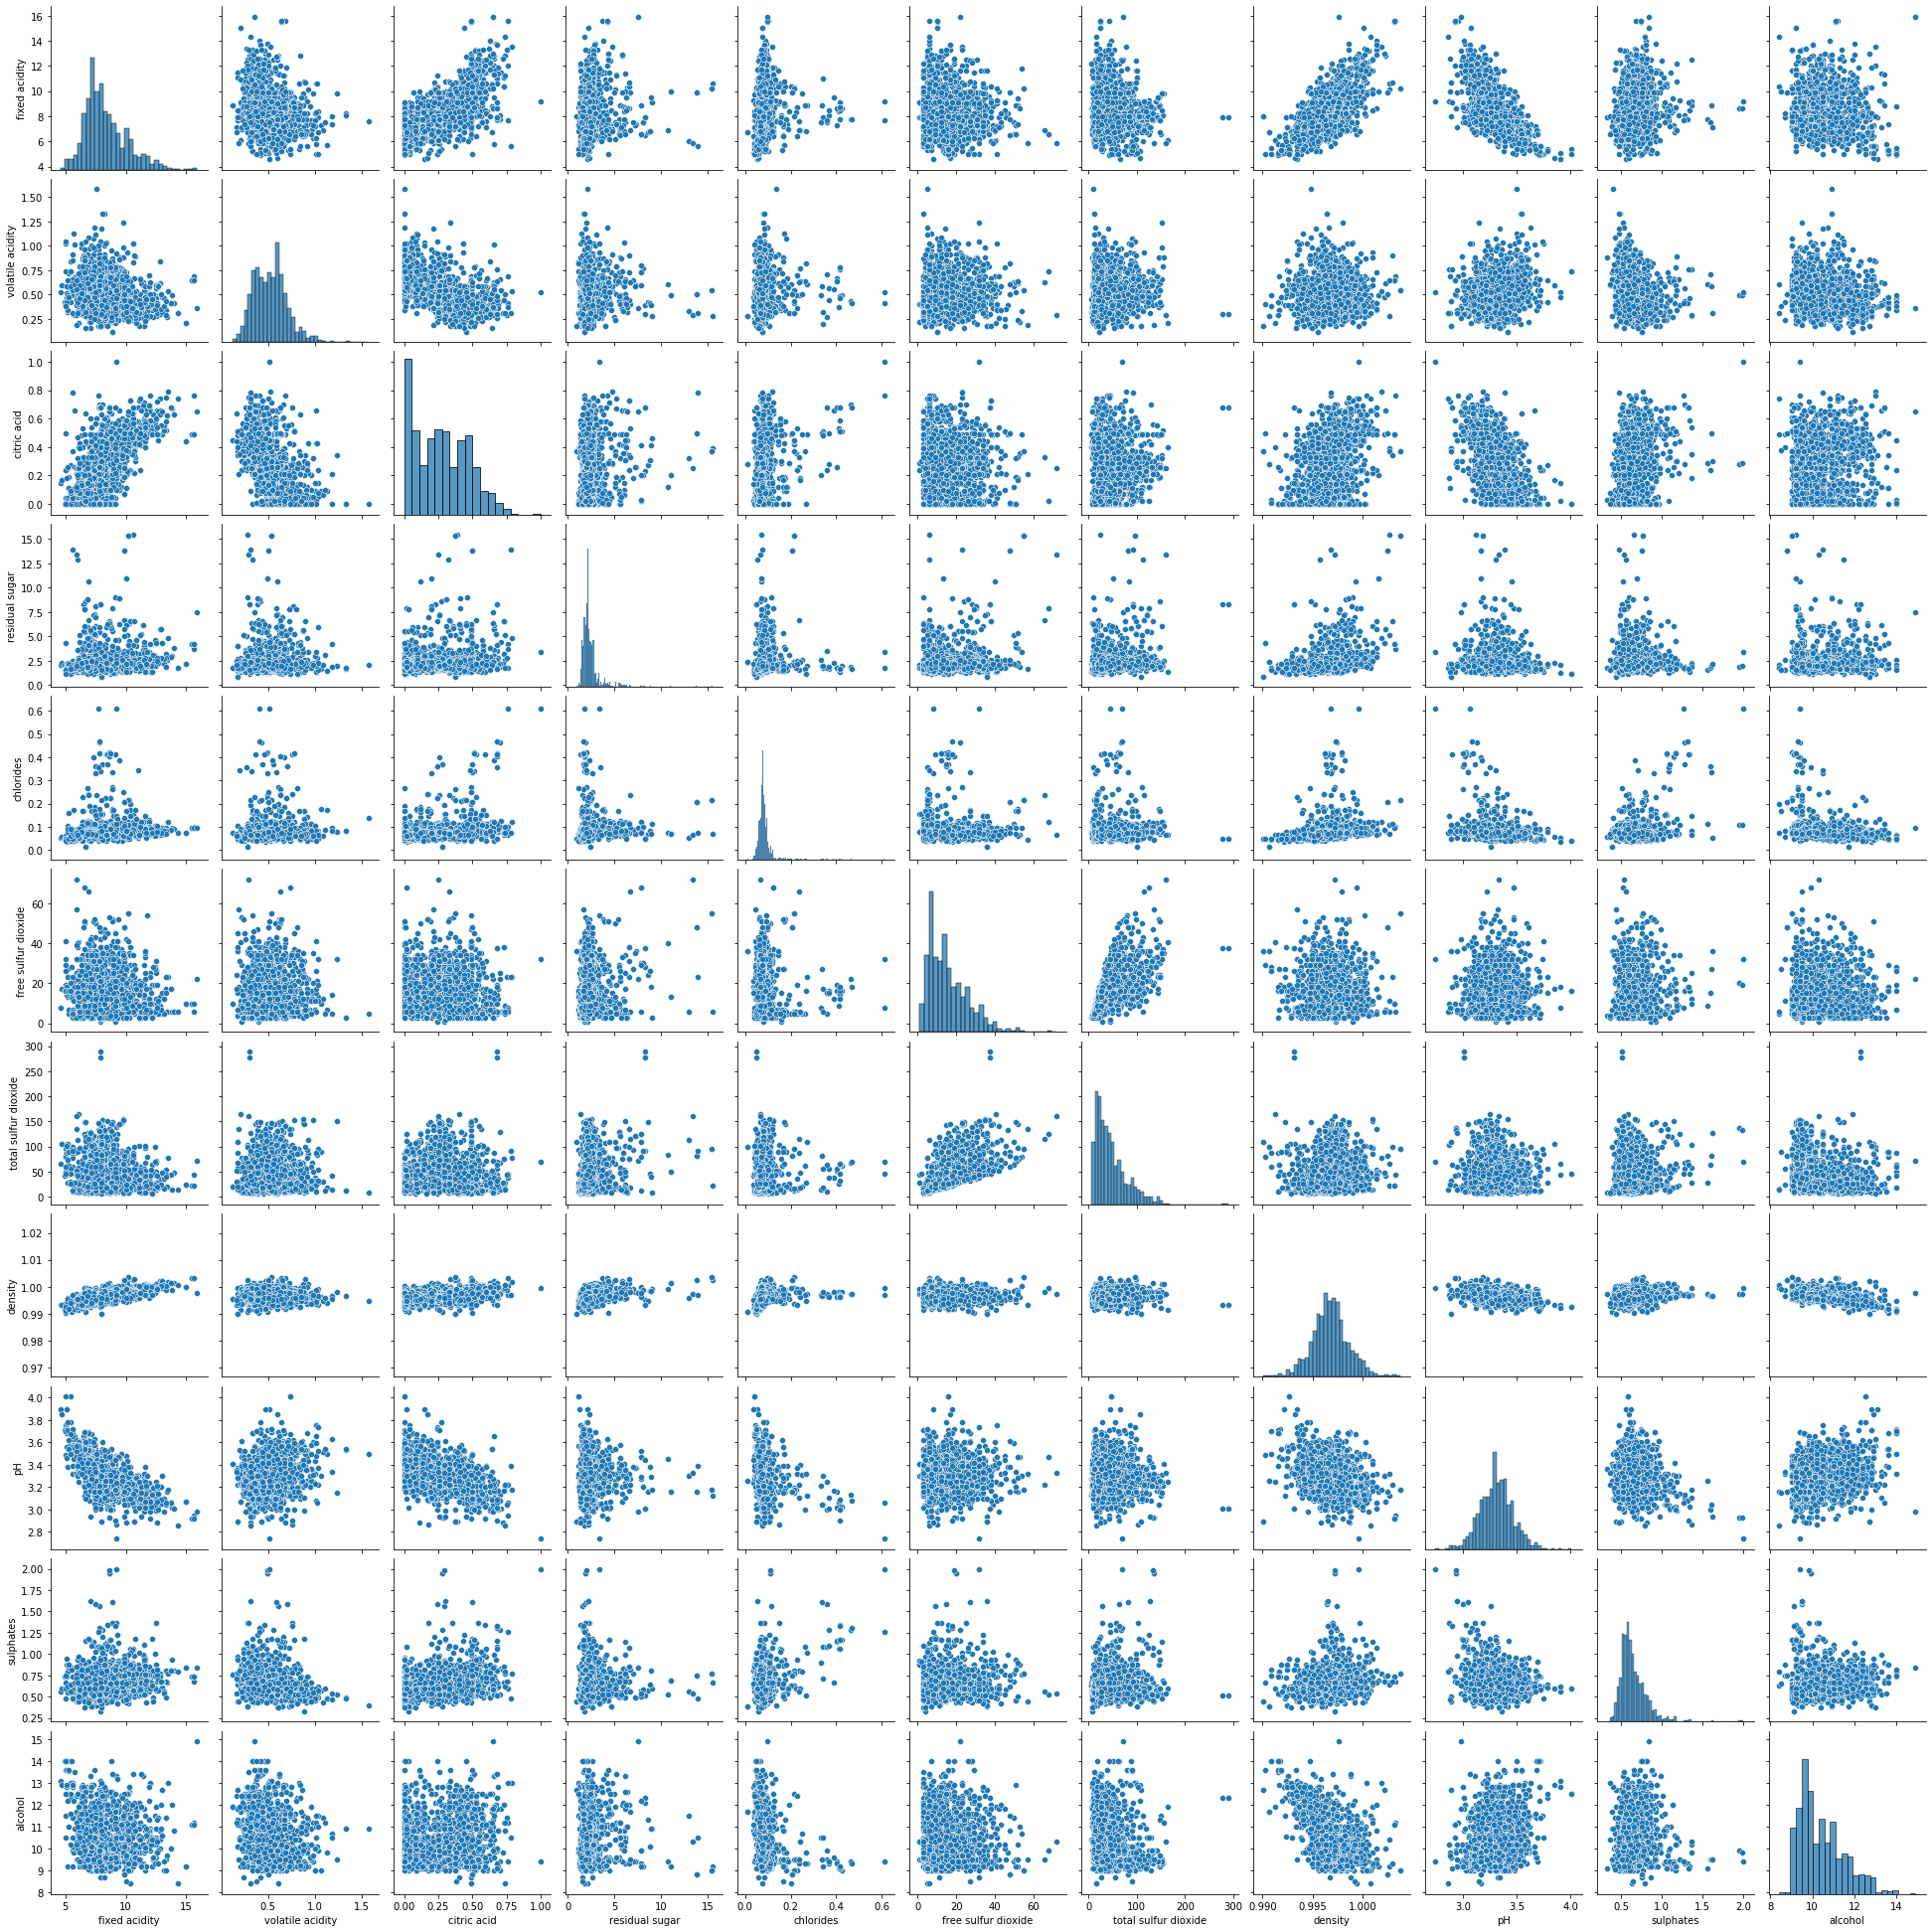

In [13]:
## https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

sns.pairplot(dfInput.loc[:, dfInput.columns != 'quality'])

Lets start with `fixed acidity`.
1. It presents a somewhat normal distribution to the left. Maybe it's a Gamma? I will test it in the next section.
2. It appears to have a linear correlation with `density` the most. And an inverse linear correlation with `pH`.

Looking at the `voletile acidity`,
1. It appears to follow a normal distribution.
2. Doesn't appear to have any linear correlation with the other features. I will check in a future section if this is actually the case.

Looking at `citric acid`:
1. Doesn't have an apparent distribution, but I will do a goodness-of-fit test for Gamma, Normal and Burr

Looking at `residual sugar`:
1. This feature is highly concentrated in the first few values (between 0 and 2?).
2. It hardly shows any good correlation with other features.
3. It appears to have a few outliers. 

Looking at `chlorides`:
1. This feature is highly concentrated between 0.1 and 0.2. Can use exponential on this one, and check the results?
2. Without values >0.3, this might be a normal distribution.

Looking at `free sulfur dioxide`:
1. It appears to have a lognormal or Gamma distribution.
2. It shows a somewhat linear correlation with `total sulfur dioxide`. The names of these features point for them coming from the same domain. I will keep an eye out and test the linearity between these two.

Looking at `total sulfur dioxide`:
1. It has some outliers candidates in the range >200

Looking at `density` and `pH`:
1. Both seem to have a normal distribution and no outlier candidates.

Looking at `sulphates`:
1. Appears to have a Log Normal distribution.
2. Some outlier candidates in the values >1.5

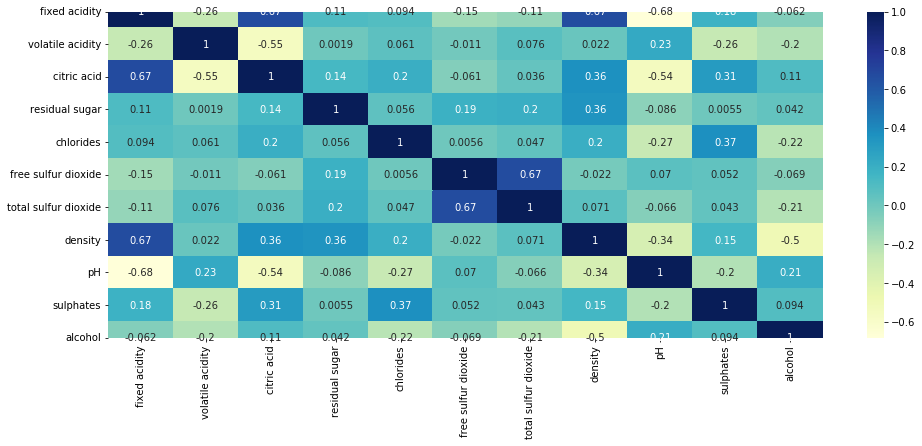

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(dfInput.loc[:, dfInput.columns != 'quality'].corr(), cmap="YlGnBu", annot=True)

* `Fixed acidity` with `Citric Acid`, `Density` & `pH`.   
* `Citric Acid` with `pH`.    
* `Free Sulfur Dioxide` with `Total Sulfur Dioxide`.   

## Actions on observed behaviour

### Is `fixed acidity` gamma or normal distributed?

Kolmogorov-Smirnov Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 0.05877180396535564	 P-value: 3.0453111968749534e-05 
                 Normal:
                     	 Statistic 0.11050460798947254	 P-value: 1.8409932346877605e-17
Cramér-von Mises Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 1.0707617689520559	 P-value: 0.0016772546305987568 
                 Normal:
                     	 Statistic 5.0433960822972566	 P-value: 5.6895932409872785e-11


/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/pyth

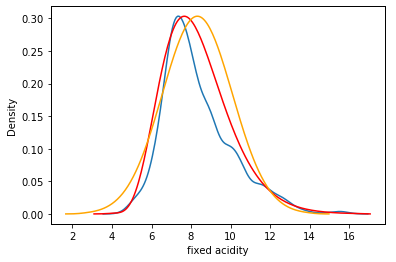

In [15]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises.html
## https://stackoverflow.com/a/2896284
## https://stackoverflow.com/a/40599521

fa_alpha, fa_loc, fa_scale = stats.gamma.fit(dfInput['fixed acidity'])
ks_gamma_test = stats.kstest(dfInput['fixed acidity'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
fa_mean, fa_var = stats.norm.fit(dfInput['fixed acidity'])
ks_normal_test = stats.kstest(dfInput['fixed acidity'], 'norm', args=(fa_mean, fa_var))

cvm_gamma_test = stats.cramervonmises(dfInput['fixed acidity'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
cvm_normal_test = stats.cramervonmises(dfInput['fixed acidity'], 'norm', args=(fa_mean, fa_var))
print(f'Kolmogorov-Smirnov Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {ks_gamma_test[0]}\t P-value: {ks_gamma_test[1]} \n \
                Normal:\n \
                    \t Statistic {ks_normal_test[0]}\t P-value: {ks_normal_test[1]}')

print(f'Cramér-von Mises Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {cvm_gamma_test.statistic}\t P-value: {cvm_gamma_test.pvalue} \n \
                Normal:\n \
                    \t Statistic {cvm_normal_test.statistic}\t P-value: {cvm_normal_test.pvalue}')



## Verify the sample distribution vs gamma estimated parameters vs normal parameters
dfFAsorted = pd.DataFrame({'fixed acidity': dfInput['fixed acidity'].sort_values()})
dfFAsorted['Gamma'] = stats.gamma.ppf(np.arange(0, 1, 1/len(dfFAsorted)), a = fa_alpha, loc = fa_loc, scale = fa_scale)
dfFAsorted['Normal'] = stats.norm.ppf(np.arange(0, 1, 1/len(dfFAsorted)), loc = fa_mean, scale = fa_var)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_yticks([])
ax3 = ax1.twinx()
ax3.set_yticks([])

sns.kdeplot(dfFAsorted['fixed acidity'], ax=ax1, bw_method=0.2)
sns.kdeplot(dfFAsorted['Gamma'], ax=ax2, bw_method=0.2, color='red')
sns.kdeplot(dfFAsorted['Normal'], ax=ax3, bw_method=0.2, color='orange')

Legend:
* Blue: Sample distribution
* Red: Gamma Distribution with estimated parameters
* Yellow: Normal distribution with estimated parameters

Normal has a better goodness-of-fit test, even though the p-value of both is very low, and through the plot, Gamma seems to fit better the data in hands.

The p-value relies on the approximation given by equation 1.8 in . It is important to keep in mind that the p-value is only accurate if one tests a simple hypothesis, i.e. the parameters of the reference distribution are known. If the parameters are estimated from the data (composite hypothesis), the computed p-value is not reliable. - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises.html

### What's `citric acid` best describing distribution?

Kolmogorov-Smirnov Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 0.23211105847280317	 P-value: 3.1224157406103614e-76 
                 Normal:
                     	 Statistic 0.08394056522867449	 P-value: 2.9965986409438043e-10 
                 Burr:
                     	 Statistic 0.1686722215033119	 P-value: 3.0885498906646853e-40
Cramér-von Mises Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 27.473076158418205	 P-value: 1.3290700540125044e-08 
                 Normal:
                     	 Statistic 2.2559722663120154	 P-value: 3.3718661446302534e-06 
                 Burr:
                     	 Statistic 15.34775957717461	 P-value: 2.8425662934594698e-09


/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/pyth

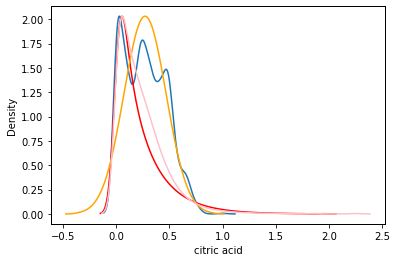

In [16]:
dfFAsorted = pd.DataFrame({'citric acid': dfInput['citric acid'].sort_values()})

fa_alpha, fa_loc, fa_scale = stats.gamma.fit(dfInput['citric acid'])
ks_gamma_test = stats.kstest(dfInput['citric acid'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
cvm_gamma_test = stats.cramervonmises(dfInput['citric acid'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
dfFAsorted['Gamma'] = stats.gamma.ppf(np.arange(0, 1, 1/len(dfFAsorted)), 
                                      a = fa_alpha, loc = fa_loc, scale = fa_scale)

fa_mean, fa_var = stats.norm.fit(dfInput['citric acid'])
ks_normal_test = stats.kstest(dfInput['citric acid'], 'norm', args=(fa_mean, fa_var))
cvm_normal_test = stats.cramervonmises(dfInput['citric acid'], 'norm', args=(fa_mean, fa_var))
dfFAsorted['Normal'] = stats.norm.ppf(np.arange(0, 1, 1/len(dfFAsorted)), 
                                      loc = fa_mean, scale = fa_var)

fa_c, fa_d, fa_loc, fa_scale = stats.burr.fit(dfInput['citric acid'])
ks_burr_test = stats.kstest(dfInput['citric acid'], 'burr', args=(fa_c, fa_d, fa_loc, fa_scale))
cvm_burr_test = stats.cramervonmises(dfInput['citric acid'], 'burr', args=(fa_c, fa_d, fa_loc, fa_scale))
dfFAsorted['Burr'] = stats.burr.ppf(np.arange(0, 1, 1/len(dfFAsorted)), 
                                    c = fa_c, d = fa_d, loc = fa_loc, scale = fa_scale)

print(f'Kolmogorov-Smirnov Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {ks_gamma_test[0]}\t P-value: {ks_gamma_test[1]} \n \
                Normal:\n \
                    \t Statistic {ks_normal_test[0]}\t P-value: {ks_normal_test[1]} \n \
                Burr:\n \
                    \t Statistic {ks_burr_test[0]}\t P-value: {ks_burr_test[1]}')

print(f'Cramér-von Mises Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {cvm_gamma_test.statistic}\t P-value: {cvm_gamma_test.pvalue} \n \
                Normal:\n \
                    \t Statistic {cvm_normal_test.statistic}\t P-value: {cvm_normal_test.pvalue} \n \
                Burr:\n \
                    \t Statistic {cvm_burr_test.statistic}\t P-value: {cvm_burr_test.pvalue}')



## Verify the sample distribution vs gamma estimated parameters vs normal parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_yticks([])
ax3 = ax1.twinx()
ax3.set_yticks([])
ax4 = ax1.twinx()
ax4.set_yticks([])

sns.kdeplot(dfFAsorted['citric acid'], ax=ax1, bw_method=0.2)
sns.kdeplot(dfFAsorted['Gamma'], ax=ax2, bw_method=0.2, color='red')
sns.kdeplot(dfFAsorted['Normal'], ax=ax3, bw_method=0.2, color='orange')
sns.kdeplot(dfFAsorted['Burr'], ax=ax4, bw_method=0.2, color='pink')

The p-value relies on the approximation given by equation 1.8 in . It is important to keep in mind that the p-value is only accurate if one tests a simple hypothesis, i.e. the parameters of the reference distribution are known. If the parameters are estimated from the data (composite hypothesis), the computed p-value is not reliable. - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises.html  

Normal seems to be better fitting, but it's not ideal.

### Outliers on `residual sugar`

https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

In [17]:
random_state = np.random.RandomState(42)

In [18]:
rs_outliers=IsolationForest(n_estimators=100,
                            contamination=float(0.015),
                            random_state=random_state,
                            max_samples = 64)

rs_outliers.fit(dfInput[['residual sugar']])

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
print(rs_outliers.get_params())

{'bootstrap': False, 'contamination': 0.015, 'max_features': 1.0, 'max_samples': 64, 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F7C4FC18040, 'verbose': 0, 'warm_start': False}


In [19]:
dfRSOutlier = pd.DataFrame(dfInput['residual sugar'])
dfRSOutlier['score'] = rs_outliers.decision_function(dfInput[['residual sugar']])
dfRSOutlier['anomaly_score'] = rs_outliers.predict(dfInput[['residual sugar']])

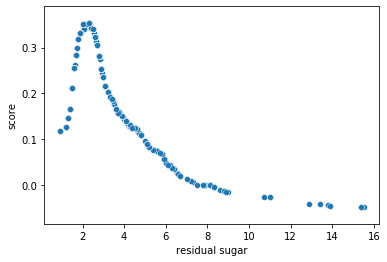

In [20]:
sns.scatterplot(x = dfRSOutlier['residual sugar'], y = dfRSOutlier['score'])

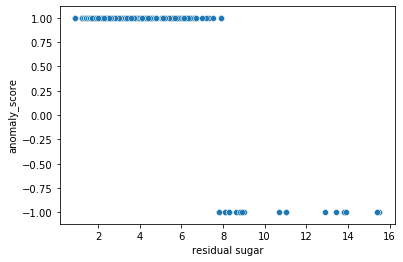

In [21]:
sns.scatterplot(x = dfRSOutlier['residual sugar'], y = dfRSOutlier['anomaly_score'])

I want to apply other methods, but I'll wait for other features having outliers, and round them all up with another method.

### Chlorides feature


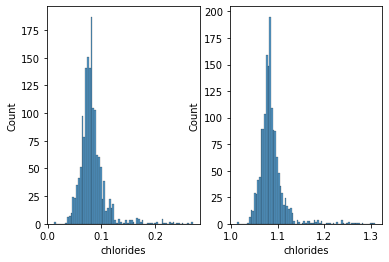

In [22]:
fig, ax =plt.subplots(1,2)
dfFilterChlorides = (dfInput['chlorides'] < 0.3)
sns.histplot((dfInput.loc[dfFilterChlorides,'chlorides']), ax = ax[0])
sns.histplot(np.exp(dfInput.loc[dfFilterChlorides,'chlorides']), ax = ax[1])

High amount of observations between 0.05 e 0.12

### The `free sulfur dioxide` distribution and linearity with `total sulfur dioxide`

Kolmogorov-Smirnov Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 0.06856144050176188	 P-value: 5.5793699517557e-07 
                 LogNormal:
                     	 Statistic 0.07713770726737582	 P-value: 1.0109581906907079e-08
Cramér-von Mises Goodness-of-fit Test:
                 Gamma:
                     	 Statistic 0.7171766952906672	 P-value: 0.011563273775919591 
                 LogNormal:
                     	 Statistic 1.1443833831025154	 P-value: 0.0011304158680263132


/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/pyth

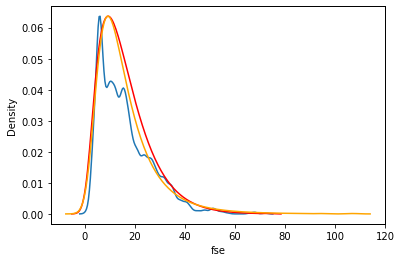

In [23]:
dfFAsorted = pd.DataFrame({'fse': dfInput['free sulfur dioxide'].sort_values()})

fa_alpha, fa_loc, fa_scale = stats.gamma.fit(dfInput['free sulfur dioxide'])
ks_gamma_test = stats.kstest(dfInput['free sulfur dioxide'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
cvm_gamma_test = stats.cramervonmises(dfInput['free sulfur dioxide'], 'gamma', args=(fa_alpha, fa_loc, fa_scale))
dfFAsorted['Gamma'] = stats.gamma.ppf(np.arange(0, 1, 1/len(dfFAsorted)), 
                                      a = fa_alpha, loc = fa_loc, scale = fa_scale)

fa_s, fa_loc, fa_scale = stats.lognorm.fit(dfInput['free sulfur dioxide'])
ks_normal_test = stats.kstest(dfInput['free sulfur dioxide'], 'lognorm', args=(fa_s, fa_loc, fa_scale))
cvm_normal_test = stats.cramervonmises(dfInput['free sulfur dioxide'], 'lognorm', args=(fa_s, fa_loc, fa_scale))
dfFAsorted['Log Normal'] = stats.lognorm.ppf(np.arange(0, 1, 1/len(dfFAsorted)), 
                                      s  = fa_s, loc = fa_loc, scale = fa_scale)


print(f'Kolmogorov-Smirnov Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {ks_gamma_test[0]}\t P-value: {ks_gamma_test[1]} \n \
                LogNormal:\n \
                    \t Statistic {ks_normal_test[0]}\t P-value: {ks_normal_test[1]}')

print(f'Cramér-von Mises Goodness-of-fit Test:\n \
                Gamma:\n \
                    \t Statistic {cvm_gamma_test.statistic}\t P-value: {cvm_gamma_test.pvalue} \n \
                LogNormal:\n \
                    \t Statistic {cvm_normal_test.statistic}\t P-value: {cvm_normal_test.pvalue}')



## Verify the sample distribution vs gamma estimated parameters vs normal parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_yticks([])
ax3 = ax1.twinx()
ax3.set_yticks([])

sns.kdeplot(dfFAsorted['fse'], ax=ax1, bw_method=0.1)
sns.kdeplot(dfFAsorted['Gamma'], ax=ax2, bw_method=0.2, color='red')
sns.kdeplot(dfFAsorted['Log Normal'], ax=ax3, bw_method=0.2, color='orange')

Log Normal seems to fit better, but even that is not good enough.

Now lets look at the linearity between this feature and `total sulful dioxide`


In [24]:
fsd_tsd_pearson = stats.pearsonr(dfInput['free sulfur dioxide'], dfInput['total sulfur dioxide'])

In [25]:
print(f'Correlation is {fsd_tsd_pearson[0]}, which is very high.')

Correlation is 0.6676664504810215, which is very high.


### `total sulfur dioxide` Outliers

{'bootstrap': False, 'contamination': 0.01, 'max_features': 1.0, 'max_samples': 222, 'n_estimators': 1000, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F7C4FC18040, 'verbose': 0, 'warm_start': False}


/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


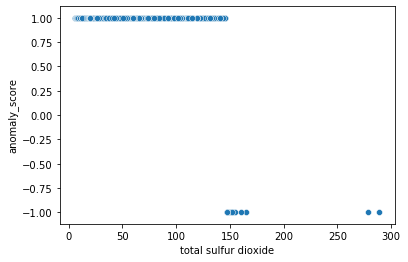

In [26]:
tsd_outliers=IsolationForest(n_estimators=1000,
                            contamination=float(0.01),
                            random_state=random_state,
                            max_samples = 222)

tsd_outliers.fit(dfInput[['total sulfur dioxide']])

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
print(tsd_outliers.get_params())

dfTSDOutlier = pd.DataFrame(dfInput['total sulfur dioxide'])
dfTSDOutlier['score'] = tsd_outliers.decision_function(dfInput[['total sulfur dioxide']])
dfTSDOutlier['anomaly_score'] = tsd_outliers.predict(dfInput[['total sulfur dioxide']])

sns.scatterplot(dfTSDOutlier['total sulfur dioxide'], dfTSDOutlier['anomaly_score'])

Clearly, there are a few values outside the norm.

# Prepare Data

## Remove outlier candidates

I choose these cuts based on the isolation forests and observations that looked too far off from the normal values.

I will however validate these values by:
1. Do Isolation forests with all the features, where the contamination is an estimate based on this method. And look the overlap of observations with the two methods.
2. Check the average quality of the removed observations.
3. Train a model with all the observations anyway, to compare the performance with and without these features.

In [27]:
dfPrepare = dfInput.loc[dfInput['residual sugar'] < 10, ]
dfPrepare = dfPrepare.loc[dfPrepare['chlorides'] < 0.5, ]
dfPrepare = dfPrepare.loc[dfPrepare['total sulfur dioxide'] < 200, ]

In [28]:
dfInput.size - dfPrepare.size 

180

Verify the `quality` of the removed observations

In [29]:
dfDifference = dfInput.loc[dfInput.index.difference(dfPrepare.index), ]

print(f'Input quality mean: {dfInput["quality"].mean()}')
print(f'Prepared data quality mean: {dfPrepare["quality"].mean()}')
print(f'Outlier candidates quality mean: {dfDifference["quality"].mean()}')


Input quality mean: 5.6360225140712945
Prepared data quality mean: 5.636363636363637
Outlier candidates quality mean: 5.6


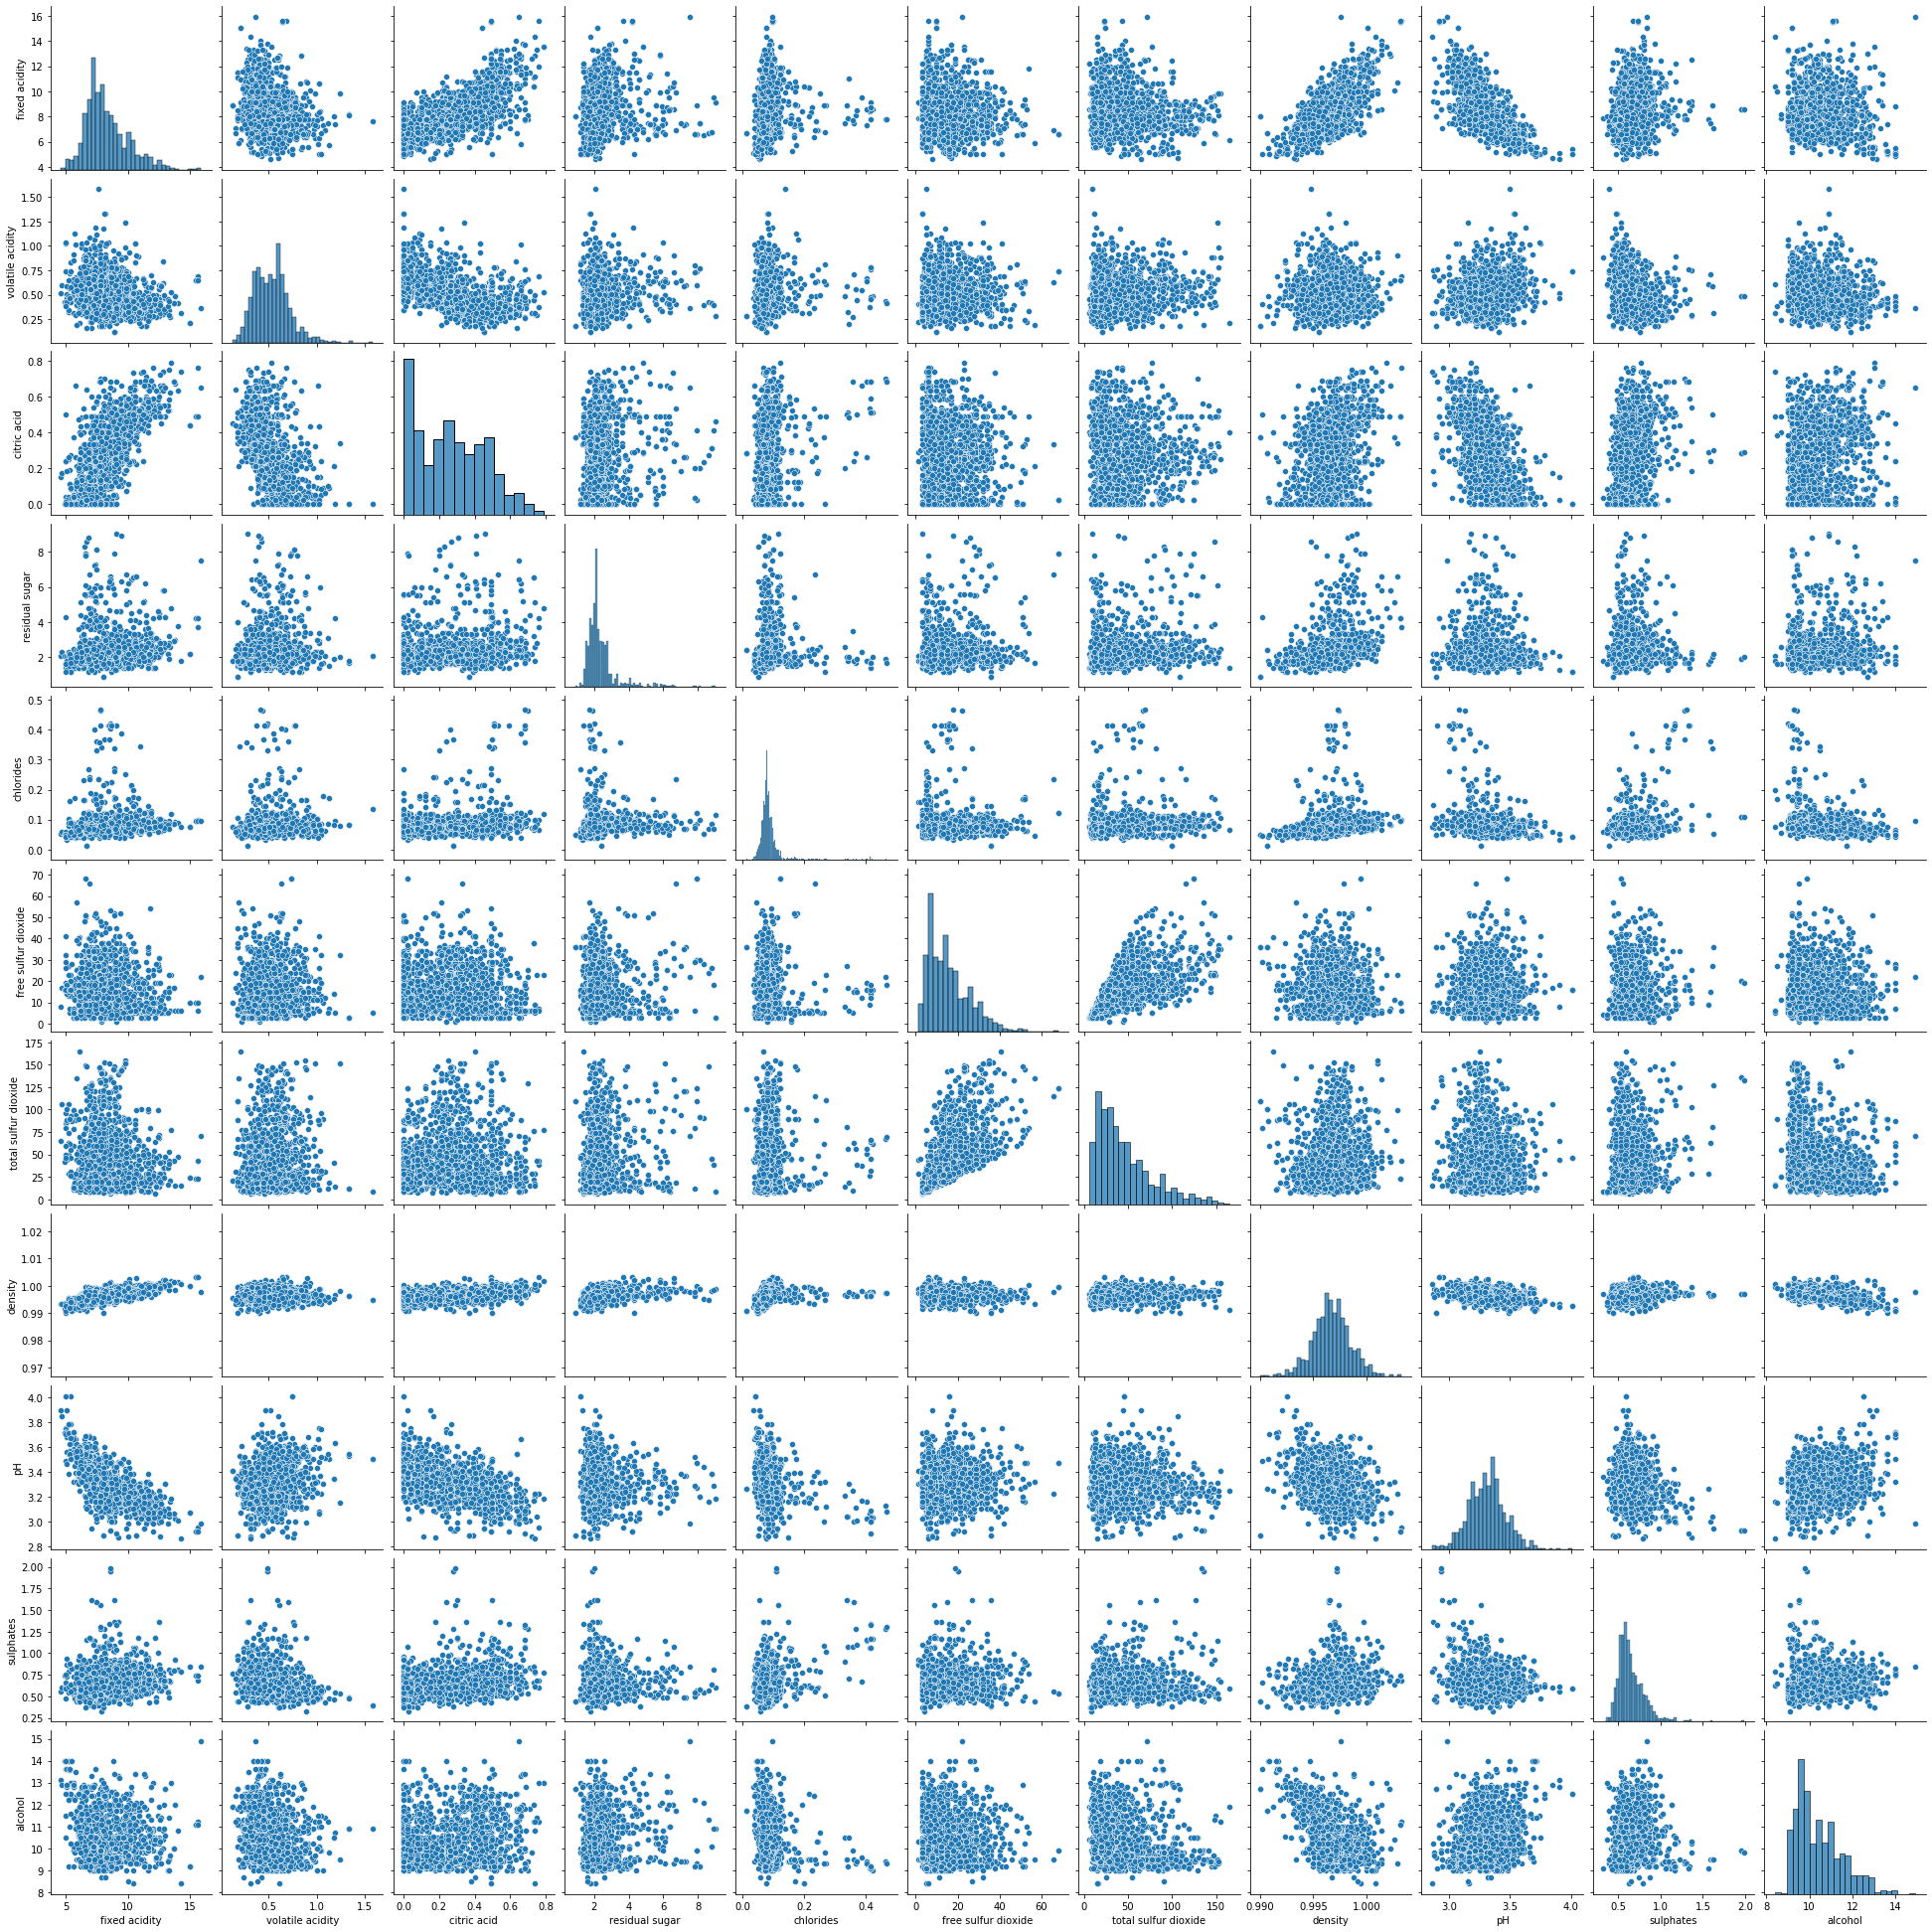

In [30]:
sns.pairplot(dfPrepare.loc[:, dfPrepare.columns != 'quality'])

## Box-plot features

TODO

## Correlation with target & A-B Correlation

In [31]:
for i in dfPrepare.columns[dfPrepare.columns != 'quality']:
    print(f"Correlation with {i}: {stats.pearsonr(dfInput['quality'], dfInput[i])[0]}")

Correlation with fixed acidity: 0.12405164911322429
Correlation with volatile acidity: -0.39055778026400717
Correlation with citric acid: 0.2263725143180414
Correlation with residual sugar: 0.013731637340066292
Correlation with chlorides: -0.12890655993005265
Correlation with free sulfur dioxide: -0.050656057244276395
Correlation with total sulfur dioxide: -0.18510028892653785
Correlation with density: -0.17491922778334873
Correlation with pH: -0.05773139120538215
Correlation with sulphates: 0.25139707906926123
Correlation with alcohol: 0.47616632400113607


1. Highest correlation with alcohol
2. Then volatile acidity
3. After, sulphates.

* Total sulfur dioxide has a higher correlation with the target than free sulfur dioxide. It's better to keep the former.

In [32]:
dfCorrs = dfPrepare.corr()
dfCorrs.to_csv('../output/CorrMatrix.csv', index = False)
dfCorrs

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.260273     0.683805   
volatile acidity          -0.260273          1.000000    -0.553951   
citric acid                0.683805         -0.553951     1.000000   
residual sugar             0.138320          0.046775     0.138397   
chlorides                  0.094229          0.070449     0.175220   
free sulfur dioxide       -0.161165         -0.004455    -0.078488   
total sulfur dioxide      -0.112640          0.096921     0.011498   
density                    0.673486          0.022865     0.374261   
pH                        -0.687371          0.232856    -0.536033   
sulphates                  0.182252         -0.269907     0.302672   
alcohol                   -0.055501         -0.202563     0.113570   
quality                    0.126077         -0.393286     0.233410   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.138320   0.094229            -0.161165   
volatile acidity            0.046775   0.070449            -0.004455   
citric acid                 0.138397   0.175220            -0.078488   
residual sugar              1.000000   0.022330             0.103993   
chlorides                   0.022330   1.000000            -0.021607   
free sulfur dioxide         0.103993  -0.021607             1.000000   
total sulfur dioxide        0.144401   0.050116             0.671680   
density                     0.344138   0.189532            -0.050618   
pH                         -0.062592  -0.249237             0.086529   
sulphates                   0.010475   0.322785             0.049093   
alcohol                     0.105029  -0.218450            -0.062355   
quality                     0.017115  -0.118700            -0.058468   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.112640  0.673486 -0.687371   0.182252   
volatile acidity                  0.096921  0.022865  0.232856  -0.269907   
citric acid                       0.011498  0.374261 -0.536033   0.302672   
residual sugar                    0.144401  0.344138 -0.062592   0.010475   
chlorides                         0.050116  0.189532 -0.249237   0.322785   
free sulfur dioxide               0.671680 -0.050618  0.086529   0.049093   
total sulfur dioxide              1.000000  0.082376 -0.048476   0.052681   
density                           0.082376  1.000000 -0.342391   0.140783   
pH                               -0.048476 -0.342391  1.000000  -0.180772   
sulphates                         0.052681  0.140783 -0.180772   1.000000   
alcohol                          -0.228436 -0.487693  0.205159   0.108238   
quality                          -0.208638 -0.174455 -0.061124   0.273595   

                       alcohol   quality  
fixed acidity        -0.055501  0.126077  
volatile acidity     -0.202563 -0.393286  
citric acid           0.113570  0.233410  
residual sugar        0.105029  0.017115  
chlorides            -0.218450 -0.118700  
free sulfur dioxide  -0.062355 -0.058468  
total sulfur dioxide -0.228436 -0.208638  
density              -0.487693 -0.174455  
pH                    0.205159 -0.061124  
sulphates             0.108238  0.273595  
alcohol               1.000000  0.477630  
quality               0.477630  1.000000

In [33]:
dfABCorrs = pd.DataFrame(columns = ['Feature A', 'Feature B', 'Correlation'])
idx = 0
for i in dfCorrs.columns:
    for j in dfCorrs.columns:
        dfABCorrs.loc[idx] = [i, j, dfCorrs.loc[i, j]]
        idx += 1
dfABCorrs.to_csv('../output/ABCorr.csv', index = False)

# Feature Importance
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


To pre-select features, it's important to have methods which give us an initial idea of their importance.

Here's a flowchart of the techniques:  
![MLFS](https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png)

Each type of feature also has a different approach/method.  
![FSTypes](https://machinelearningmastery.com/wp-content/uploads/2020/06/Overview-of-Data-Variable-Types2.png)   

A thing to keep in mind, is that we can select important, but redundant features, with these methods.
>Most of these techniques are univariate, meaning that they evaluate each predictor in isolation. In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors.  — Page 499, Applied Predictive Modeling, 2013.


https://machinelearningmastery.com/calculate-feature-importance-with-python/

Before anything else, I will make some transformations on the data, mainly, a MinMax transformation.

For this, I will use sklearn `MinMaxScaler` and create new features with the prefix `mms_`

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms_columns = [column for column in dfPrepare.columns if column != 'quality']
mms_columns_tagged = [f'mms_{column}' for column in mms_columns]

mms_scaler = MinMaxScaler()
mms_scaler.fit(dfPrepare[mms_columns])

# https://www.kite.com/python/answers/how-to-create-pandas-dataframe-from-a-numpy-array-in-python
dfScaledTemp = pd.DataFrame(mms_scaler.transform(dfPrepare[mms_columns]), 
                            columns = mms_columns_tagged, # The names are the columns with the prefix mms_
                            index = dfPrepare.index.to_numpy()) # Needs dfPrepare indexes, since they have skip indexes (when outlier candidates were removed)

dfFeatureEmpower = pd.concat([dfPrepare, dfScaledTemp], axis = 1) # axis = 1 -> columns

dfFeatureEmpower

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      ...  mms_volatile acidity  mms_citric acid  mms_residual sugar  \
0     ...              0.397260         0.000000            0.123457   
1     ...              0.520548         0.000000            0.209877   
2     ...              0.438356         0.050633            0.172840   
3     ...              0.109589         0.708861            0.123457   
4     ...              0.397260         0.000000            0.123457   
...   ...                   ...              ...                 ...   
1594  ...              0.328767         0.101266            0.135802   
1595  ...              0.294521         0.126582            0.160494   
1596  ...              0.267123         0.164557            0.172840   
1597  ...              0.359589         0.151899            0.135802   
1598  ...              0.130137         0.594937            0.333333   

      mms_chlorides  mms_free sulfur dioxide  mms_total sulfur dioxide  \
0          0.140659                 0.149254                  0.176101   
1          0.189011                 0.358209                  0.383648   
2          0.175824                 0.208955                  0.301887   
3          0.138462                 0.238806                  0.339623   
4          0.140659                 0.149254                  0.176101   
...             ...                      ...                       ...   
1594       0.171429                 0.462687                  0.238994   
1595       0.109890                 0.567164                  0.283019   
1596       0.140659                 0.417910                  0.213836   
1597       0.138462                 0.462687                  0.238994   
1598       0.120879                 0.253731                  0.226415   

      mms_density    mms_pH  mms_sulphates  mms_alcohol  
0        0.588728  0.565217       0.139394     0.153846  
1        0.512567  0.295652       0.212121     0.215385  
2        0.527799  0.347826       0.193939     0.215385  
3        0.603960  0.260870       0.151515     0.215385  
4        0.588728  0.565217       0.139394     0.153846  
...   

Okey, I think now we are ready to perform some feature importance methods.

## Linear & Logistic Regression Coefficients

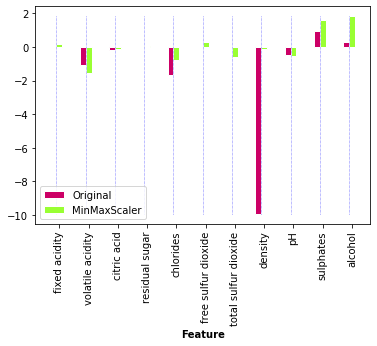

In [35]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']

model_original = LinearRegression()
model_mms = LinearRegression()
# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_mms.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.coef_
importance_mms = model_mms.coef_

# https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/11-grouped-barplot.ipynb
# plot feature importance
# set width of bars
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(importance_original))
r2 = [x + barWidth for x in r1]

miny = min(np.append(importance_original, importance_mms))
maxy = max(np.append(importance_original, importance_mms))
# Make the plot
plt.bar(r1, importance_original, color='#CC0066', width=barWidth, edgecolor='white', label='Original')
plt.bar(r2, importance_mms, color='#99FF33', width=barWidth, edgecolor='white', label='MinMaxScaler')
plt.vlines(x=[x + barWidth/2 for x in r1], ymin=miny, ymax = maxy, color='blue', ls=':', lw=0.5)

# Add xticks on the middle of the group bars
plt.xlabel('Feature', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(importance_original))], columns, 
           rotation = 90)

# Create legend & Show graphic
plt.legend()
plt.show()

We can take from here that the original `density` feature has a very high coefficient. When scaled, all that importance seems to disappear and is transported to `sulphates` and `alcohol` mainly. On the other hard, residual sugar and fixed acidity barely appear, both original and when scaled. Overall the features seem to be more well distributed in terms of coefficients when scaled.

In [36]:
# summarize feature importance
for i,v in enumerate(importance_original):
    print(f'Feature {columns[i]}, Score: {v}')
    print(f'Feature {columns_mms[i]}, Score: {importance_mms[i]} \n')

Feature fixed acidity, Score: 0.014288375258419162
Feature mms_fixed acidity, Score: 0.1614586404201302 

Feature volatile acidity, Score: -1.066966513284586
Feature mms_volatile acidity, Score: -1.5577711093955084 

Feature citric acid, Score: -0.15986101870053834
Feature mms_citric acid, Score: -0.12629020477342978 

Feature residual sugar, Score: 0.005675466558121928
Feature mms_residual sugar, Score: 0.04597127912076604 

Feature chlorides, Score: -1.6826052193394203
Feature mms_chlorides, Score: -0.7655853747994192 

Feature free sulfur dioxide, Score: 0.0044694348699858
Feature mms_free sulfur dioxide, Score: 0.29945213628905354 

Feature total sulfur dioxide, Score: -0.003671868082370633
Feature mms_total sulfur dioxide, Score: -0.5838270250969271 

Feature density, Score: -9.93310433558886
Feature mms_density, Score: -0.13042165992626775 

Feature pH, Score: -0.4596500851168528
Feature mms_pH, Score: -0.5285975978843795 

Feature sulphates, Score: 0.955095911203689
Feature mms_

Lets look at the same technique, but with logistic regression, which in the end, makes more sense for this question.

In [37]:
from sklearn.linear_model import LogisticRegression

model_original = LogisticRegression()
model_mms = LogisticRegression()
# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_mms.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.coef_
importance_mms = model_mms.coef_

LR_coefs_list = []
for i, q in enumerate([3,4,5,6,7,8]):
    for j, f in enumerate(columns):
        LR_coefs_list.append([q, f, round(importance_original[i][j],5), round(importance_mms[i][j],5)])

LR_coefs_df = pd.DataFrame(LR_coefs_list, columns = ['quality', 'feature', 'original', 'scaled'])
LR_coefs_df = (LR_coefs_df.melt(id_vars = ['quality','feature'])
               .sort_values(by = ['quality', 'feature'])
               .reset_index())

LR_coefs_df

/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

index  quality               feature  variable    value
0       10        3               alcohol  original -0.17350
1       76        3               alcohol    scaled -0.75331
2        4        3             chlorides  original  0.01204
3       70        3             chlorides    scaled  0.77357
4        2        3           citric acid  original -0.02331
..     ...      ...                   ...       ...      ...
127    130        8             sulphates    scaled  0.90251
128     61        8  total sulfur dioxide  original  0.00940
129    127        8  total sulfur dioxide    scaled -0.26536
130     56        8      volatile acidity  original -0.10076
131    122        8      volatile acidity    scaled -0.56510

[132 rows x 5 columns]

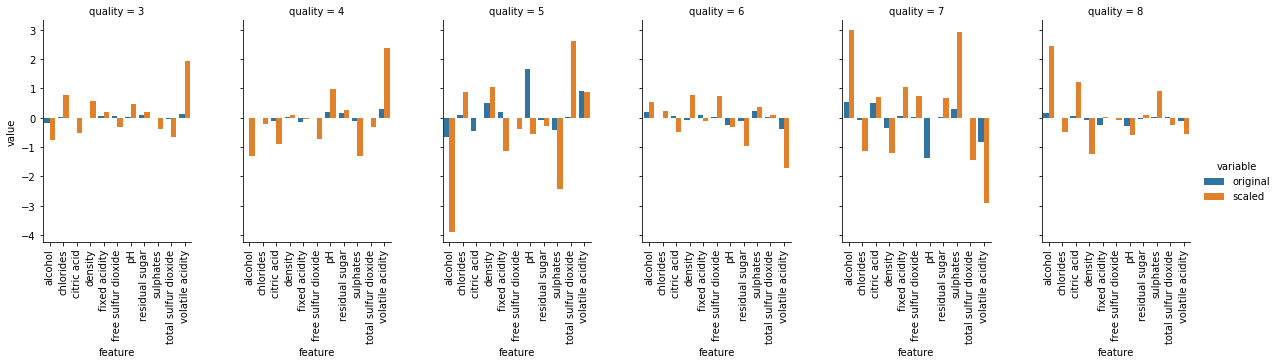

In [38]:
# https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/grouped-barplot.ipynb

import seaborn as sns

plot = sns.catplot(x="feature", y="value",
                 hue="variable", col="quality",
                 data=LR_coefs_df, kind="bar",
                 height=4, aspect=.7);

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

# Show graphic
plt.show()

Looking at `Alcohol`, it appears to have a general importance in all qualities, but only the scaled version of the feature. Only in `Quality=5` and `=7` does it appear to have some importance in the original version. Albeit in `Quality=6`, no feature appears as more predominant than the other, when looking at the original features.  
The same predominance appears in `volatile acidity`, as it appears quite predominantly in almost every quality category, both in the original and scaled versions, albeit in the original version, in accordance with the rest of the features, it doesn't have coefficient values much higher than the others.  
The next feature to look at is `sulphates`, which looks to have a saying in both `Quality=5` and `Quality=7`, and, to a lesser degree, in `Quality=4` and `Quality=8`. This is related to the scaled version.  
`total sulfur dioxide` also appears to have high coefficients in the scaled version, mostly in `Quality=5` and `=7`.  
Another interesting feature, and again, in `Quality=5` and `=7`, is `pH`, which appears to have high coefficients in the original version of the feature. It doesn't appear that much in the rest of the classes.  

Based on this, if my `a priori` ranking of feature importances is:
1. `volatile acidity` (scaled)
2. `sulphates` (scaled)
3. `alcohol` (scaled)
4. `total sulfur dioxide` (scaled)
5. ...

I think a more methodical approach would be to do the sum of the absolute value of each coefficient of the different qualities for each type of variable.  
This is translated to:

In [39]:
methodic_LR_importance = (LR_coefs_df
.groupby(['variable','feature']) # Group by type of variable and feature
.value # select the coefficent
.apply(lambda x: np.sum(np.abs(x))) # do the sum of the absolute coefficients
.reset_index() 
.sort_values(by = ['variable','value'], ascending = False) # sort by type of variable and value. Higher = More important
)

methodic_LR_importance

variable               feature     value
11    scaled               alcohol  11.89235
21    scaled      volatile acidity  10.34777
19    scaled             sulphates   8.32403
20    scaled  total sulfur dioxide   5.37077
14    scaled               density   4.89803
13    scaled           citric acid   3.83239
12    scaled             chlorides   3.72760
16    scaled   free sulfur dioxide   2.99646
17    scaled                    pH   2.91436
15    scaled         fixed acidity   2.56909
18    scaled        residual sugar   2.48548
6   original                    pH   3.80357
10  original      volatile acidity   2.63613
0   original               alcohol   1.72050
2   original           citric acid   1.21243
8   original             sulphates   1.08738
3   original               density   1.03752
4   original         fixed acidity   0.81263
7   original        residual sugar   0.48435
1   original             chlorides   0.22341
5   original   free sulfur dioxide   0.14755
9   original  total sulfur dioxide   0.11180

The results don't differ much from what I expected `a priori`. This table is a good aid to the bar plot of the coefficients.   

As a final note, it's worth noting that some of these features are highly correlated within themselves, and the Logistic Regression coefficient of all affected features will take a hit. For example, we know from previous observations that free and total sulfur dioxide are highly correlated. If I remove one of them from this analysis, the other will rise in importance. Therefore, these results are a aid and we shouldn't base any final decision on them.

Lets look at more methods to weight feature importance.



## Decision Tree Feature Importance

> Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

> This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

### Decision Tree Regressor

In [40]:
print_scores = False
np.random.seed(42)

from sklearn.tree import DecisionTreeRegressor

columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']
columns_all = [column for column in dfFeatureEmpower.columns if column != 'quality']

model_original = DecisionTreeRegressor()
model_scaled = DecisionTreeRegressor()
model_all = DecisionTreeRegressor()

# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_scaled.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])
model_all.fit(dfFeatureEmpower[columns_all], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.feature_importances_
importance_scaled = model_scaled.feature_importances_
importance_all = model_all.feature_importances_

DTR_importance_list = []

    # summarize feature importance
for i,v in enumerate(importance_original):
    if print_scores:
        print(f'Feature {columns[i]}, Score: {v}')
        print(f'Feature {columns_mms[i]}, Score: {importance_scaled[i]}')
    DTR_importance_list.append(['og and_scaled',columns[i], v])
    DTR_importance_list.append(['og and_scaled',columns_mms[i], importance_scaled[i]])

if print_scores:
    print('\n')

for i,v in enumerate(importance_all):
    if print_scores:
        print(f'Feature {columns_all[i]}, Score: {v}')
    DTR_importance_list.append(['all',columns_all[i], v])

DTR_importance_df = pd.DataFrame(DTR_importance_list, columns = ['model', 'feature', 'value'])

Lets apply the same graph method as in the Logistic regression to check the feature importances.

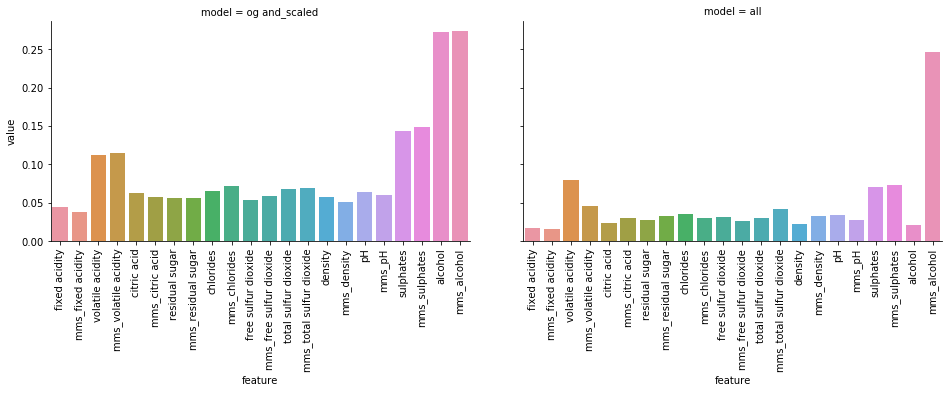

In [41]:
plot = sns.catplot(x="feature", y="value", col="model",
                 data=DTR_importance_df, kind="bar",
                 height=4, aspect=1.7);

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

# Show graphic
plt.show()

The first plot are two different feature importances. The ones feature importance scores of the original features, and the feature importance of the scaled features. They, as can be extrapolated from the code above, were obtained from two different models.  
From these results, we can observe again that the three most important features are indeed `alcohol`, `sulphates` and `volatile acidity`, followed by `chlorides`, `total sulfur dioxide`. The rest are somewhat equally less important than the mentioned ones. This happens in both the original and scaled versions.

Due to the nature of randomness on which the Decision Tree algorithm runs on, the model with all features has less of pattern on which features will arise. But, based on a few runs, the sum of importance of the original and scaled features will be almost the same as using them alone, hinting that these features do, indeed, have such importances in their separated models.

### Decision Tree Classifier

In [42]:
print_scores = False
np.random.seed(42)

from sklearn.tree import DecisionTreeClassifier

columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']
columns_all = [column for column in dfFeatureEmpower.columns if column != 'quality']

model_original = DecisionTreeClassifier()
model_scaled = DecisionTreeClassifier()
model_all = DecisionTreeClassifier()

# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_scaled.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])
model_all.fit(dfFeatureEmpower[columns_all], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.feature_importances_
importance_scaled = model_scaled.feature_importances_
importance_all = model_all.feature_importances_

DTR_importance_list = []

# summarize feature importance
for i,v in enumerate(importance_original):
    if print_scores:
        print(f'Feature {columns[i]}, Score: {v}')
        print(f'Feature {columns_mms[i]}, Score: {importance_scaled[i]}')
    DTR_importance_list.append(['og and_scaled',columns[i], v])
    DTR_importance_list.append(['og and_scaled',columns_mms[i], importance_scaled[i]])

if print_scores:
    print('\n')

for i,v in enumerate(importance_all):
    if print_scores:
        print(f'Feature {columns_all[i]}, Score: {v}')
    DTR_importance_list.append(['all',columns_all[i], v])

DTR_importance_df = pd.DataFrame(DTR_importance_list, columns = ['model', 'feature', 'value'])

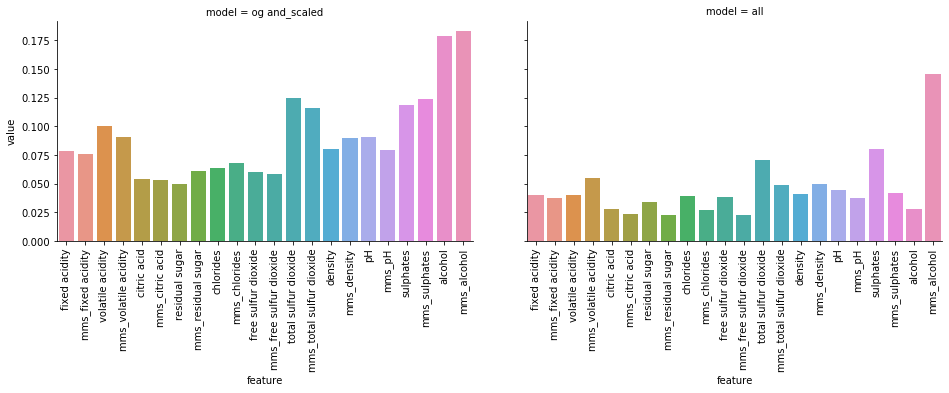

In [43]:
plot = sns.catplot(x="feature", y="value", col="model",
                 data=DTR_importance_df, kind="bar",
                 height=4, aspect=1.7);

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

# Show graphic
plt.show()

The plots are done the same way as before. We can see the arise, in both original and scaled features models, of the `alcohol`, `sulphates`, `total sulfur dioxide` and `volatile acidity` features. This goes in accordance with the observations using the Logistic Regression method.

But the issue with Decision trees, is we are training one tree, not several, as in a random forest. Decision trees allow for less confidence in the true level of the features importance. 
Lets look at Random forests, both from `sklearn` and `XGBoost`

## RandomForest & XGBoost


In [44]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']

# define the model
model_original = RandomForestClassifier(n_estimators=1000)
model_scaled = RandomForestClassifier(n_estimators=1000)

# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_scaled.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.feature_importances_
importance_scaled = model_scaled.feature_importances_

RF_importance_list = []

# summarize feature importance
for i,v in enumerate(importance_original):
    if print_scores:
        print(f'Feature {columns[i]}, Score: {v}')
        print(f'Feature {columns_mms[i]}, Score: {importance_scaled[i]}')
    RF_importance_list.append(['original',columns[i], v])
    RF_importance_list.append(['scaled',columns[i], importance_scaled[i]])
    
RF_importance_list = pd.DataFrame(RF_importance_list, columns = ['model', 'feature', 'value'])

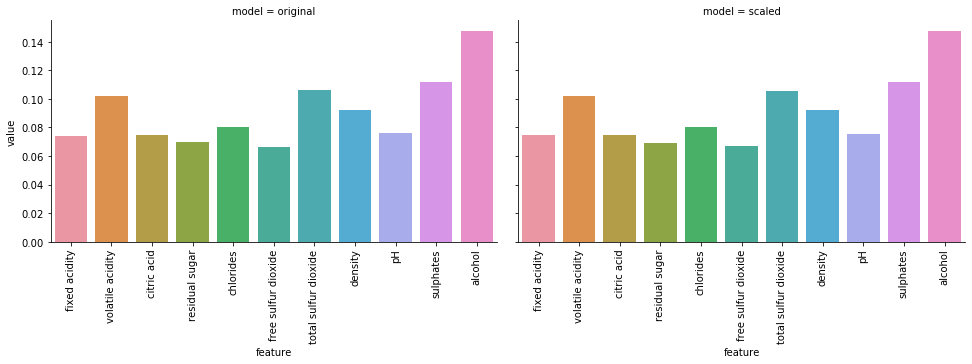

In [45]:
plot = sns.catplot(x="feature", y="value", col="model",
                 data=RF_importance_list, kind="bar",
                 height=4, aspect=1.7);

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

# Show graphic
plt.show()

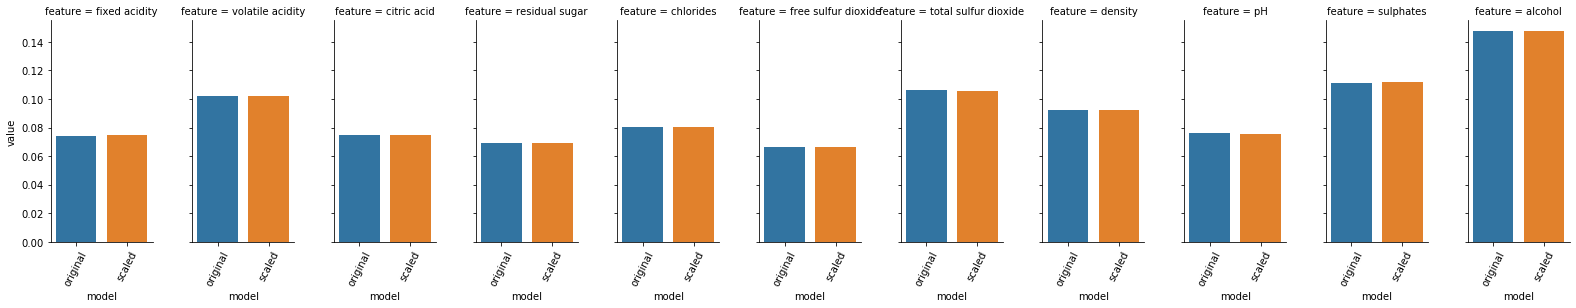

In [46]:
plot = sns.catplot(x="model", y="value", col="feature",
                 data=RF_importance_list, kind="bar",
                 height=4, aspect=0.5);

[plt.setp(ax.get_xticklabels(), rotation=63) for ax in plot.axes.flat]

# Show graphic
plt.show()

Both plots say the same thing. One, the most noticable, is that wether a feature is scaled or original, it's importance is going to be the same. This of a particularity of Decision Trees / Random Forests. There's barely any need for scaling of features. But there are other methods to apply on features which can improve these methods.  
Second, and in accord to the question we want to answer of which are the most important features, the results tell the same story as before, `alcohol`, `total sulfur dioxide`, `volatile acidity` and `sulphates` are the most important features. `density` also raises a bit above the rest, but nothing extraordinary.   
Lets use `XGBoost`. 

In [47]:
from xgboost import XGBClassifier
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

np.random.seed(42)

# define the model
model_original = XGBClassifier(n_estimators=100)
model_scaled = XGBClassifier(n_estimators=100)

# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_scaled.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

# get importance
importance_original = model_original.feature_importances_
importance_scaled = model_scaled.feature_importances_

XGB_importance_list = []

# summarize feature importance
for i,v in enumerate(importance_original):
    if print_scores:
        print(f'Feature {columns[i]}, Score: {v}')
        print(f'Feature {columns_mms[i]}, Score: {importance_scaled[i]}')
    XGB_importance_list.append(['original',columns[i], v])
    XGB_importance_list.append(['scaled',columns[i], importance_scaled[i]])
    
XGB_importance_list = pd.DataFrame(XGB_importance_list, columns = ['model', 'feature', 'value'])

/home/portugapt/.pyenv/versions/3.8.1/envs/LearnHub/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


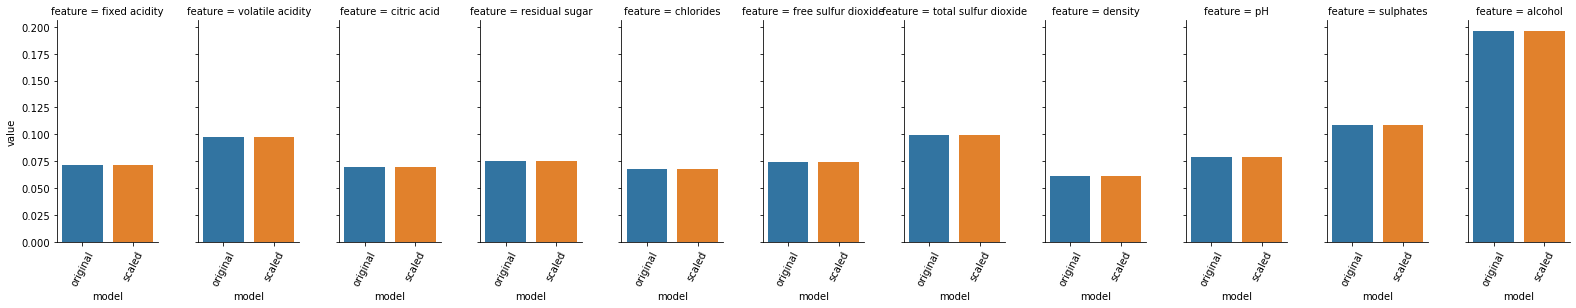

In [48]:
plot = sns.catplot(x="model", y="value", col="feature",
                 data=XGB_importance_list, kind="bar",
                 height=4, aspect=0.5);

[plt.setp(ax.get_xticklabels(), rotation=63) for ax in plot.axes.flat]

# Show graphic
plt.show()

Same as before, `alcohol` is the revealed as the most important feature. Behind are `total sulfur dioxide`, `volatile acidity` and `sulphates`.  

Lets look at another technique, `permutation_importance`, which can reduce the effect spoken before, of highly correlated features.

## Feature Permutation

https://www.kaggle.com/dansbecker/permutation-importance

I can either use the function in sklearn or the one in ELI5.  
But I have to choose a base estimator. Since, from observations, they all give the same results, I think it would be more interesting to see the results in more volatile estimators, e.g. decision trees. I should give a good indication of which features, without (at least one) interaction between eachother, as is the case of `free` and `total sulfur dioxide`.

In [49]:
import eli5
from sklearn.tree import DecisionTreeClassifier
from eli5.sklearn import PermutationImportance

np.random.seed(42)

columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']

model_original = DecisionTreeClassifier()
model_scaled = DecisionTreeClassifier()

# fit the model
model_original.fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
model_scaled.fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

# Use the permutation
perm_original = PermutationImportance(model_original, random_state=42).fit(dfFeatureEmpower[columns], dfFeatureEmpower['quality'])
perm_scaled = PermutationImportance(model_scaled, random_state=42).fit(dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'])

In [50]:
eli5.show_weights(perm_original, feature_names = dfFeatureEmpower[columns].columns.tolist())

In [51]:
eli5.show_weights(perm_scaled, feature_names = dfFeatureEmpower[columns].columns.tolist())

In [52]:
from sklearn.inspection import permutation_importance
np.random.seed(42)

sk_perm_original = permutation_importance(model_original, dfFeatureEmpower[columns], dfFeatureEmpower['quality'], n_repeats=15, random_state=42)
sk_perm_scalar = permutation_importance(model_scaled, dfFeatureEmpower[columns_mms], dfFeatureEmpower['quality'], n_repeats=15, random_state=42)

permutation_list = []
for i, v in enumerate(sk_perm_original['importances_mean']):
    permutation_list.append(['original',columns[i], v, sk_perm_original['importances_std'][i]])
    permutation_list.append(['scaled',columns[i], sk_perm_scalar['importances_mean'][i], sk_perm_scalar['importances_std'][i]])
    
permutation_df = pd.DataFrame(permutation_list, columns = ['model', 'feature', 'value', 'value-sd'])

In [53]:
permutation_df.sort_values(by = ['model', 'value'], ascending = False)

model               feature     value  value-sd
21    scaled               alcohol  0.397012  0.010394
19    scaled             sulphates  0.309175  0.007675
3     scaled      volatile acidity  0.280682  0.008817
13    scaled  total sulfur dioxide  0.254924  0.008782
17    scaled                    pH  0.136406  0.006963
15    scaled               density  0.130429  0.006787
9     scaled             chlorides  0.118266  0.006640
1     scaled         fixed acidity  0.102988  0.005618
11    scaled   free sulfur dioxide  0.099116  0.003411
7     scaled        residual sugar  0.084049  0.003952
5     scaled           citric acid  0.078493  0.003330
20  original               alcohol  0.408375  0.012851
18  original             sulphates  0.304251  0.008456
2   original      volatile acidity  0.280976  0.008688
12  original  total sulfur dioxide  0.268476  0.007364
16  original                    pH  0.145076  0.006251
14  original               density  0.122180  0.006072
8   original             chlorides  0.114394  0.006301
0   original         fixed acidity  0.105219  0.004739
10  original   free sulfur dioxide  0.103409  0.004524
6   original        residual sugar  0.079630  0.004038
4   original           citric acid  0.073190  0.004101

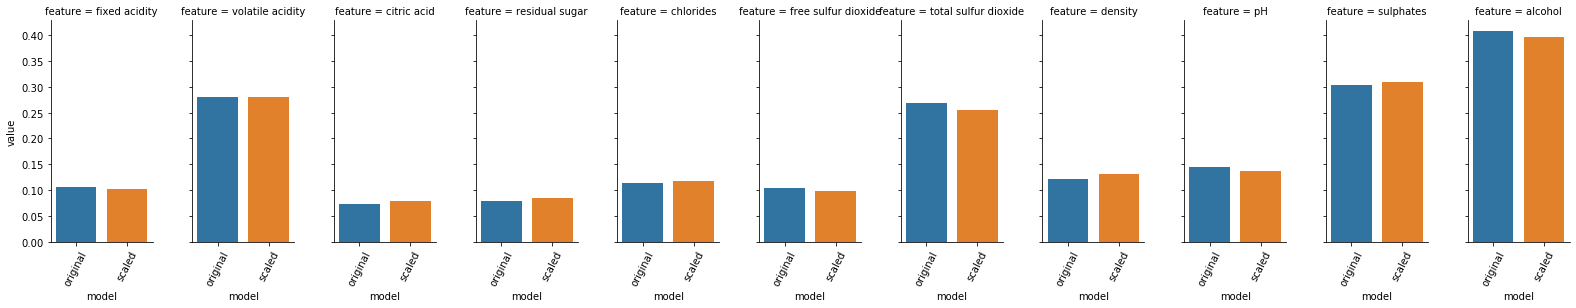

In [54]:
plot = sns.catplot(x="model", y="value", col="feature",
                 data=permutation_df, kind="bar",
                 height=4, aspect=0.5);

[plt.setp(ax.get_xticklabels(), rotation=63) for ax in plot.axes.flat]

# Show graphic
plt.show()

It appears that, with permutation, both from `sklearn` and `eli5` libraries, the results appear to concur with the previous seen results. `alcohol` is the predominant important feature with `sulphates`, `total sulfur dioxide` and `volatile acidity` lagging a bit behind. The rest of the features are less and less important.

Some models have the  assumption that there should be no perfect multicollinearity. A methodical approach to this issue, tied to feature selection methods, would be to select the top 30% features, compare each one of them to the bottom 70%, and flag features from the bottom 70% if they have an absolute correlation higher than, for example, 0.6, to the feature being it compared to.
Lets translate this to code.

## Flag unimportant features.

I will select the top features from the last method (Feature permutation). 

In [55]:
feature_df = permutation_df.loc[permutation_df['model'] == 'original', ['feature', 'value']]

corr_df = dfFeatureEmpower[columns].corr()

#corr_df = corr_df.rename(lambda x: x[4:], axis = 0)
#corr_df = corr_df.rename(lambda x: x[4:], axis = 1)
corr_df

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.260273     0.683805   
volatile acidity          -0.260273          1.000000    -0.553951   
citric acid                0.683805         -0.553951     1.000000   
residual sugar             0.138320          0.046775     0.138397   
chlorides                  0.094229          0.070449     0.175220   
free sulfur dioxide       -0.161165         -0.004455    -0.078488   
total sulfur dioxide      -0.112640          0.096921     0.011498   
density                    0.673486          0.022865     0.374261   
pH                        -0.687371          0.232856    -0.536033   
sulphates                  0.182252         -0.269907     0.302672   
alcohol                   -0.055501         -0.202563     0.113570   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.138320   0.094229            -0.161165   
volatile acidity            0.046775   0.070449            -0.004455   
citric acid                 0.138397   0.175220            -0.078488   
residual sugar              1.000000   0.022330             0.103993   
chlorides                   0.022330   1.000000            -0.021607   
free sulfur dioxide         0.103993  -0.021607             1.000000   
total sulfur dioxide        0.144401   0.050116             0.671680   
density                     0.344138   0.189532            -0.050618   
pH                         -0.062592  -0.249237             0.086529   
sulphates                   0.010475   0.322785             0.049093   
alcohol                     0.105029  -0.218450            -0.062355   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.112640  0.673486 -0.687371   0.182252   
volatile acidity                  0.096921  0.022865  0.232856  -0.269907   
citric acid                       0.011498  0.374261 -0.536033   0.302672   
residual sugar                    0.144401  0.344138 -0.062592   0.010475   
chlorides                         0.050116  0.189532 -0.249237   0.322785   
free sulfur dioxide               0.671680 -0.050618  0.086529   0.049093   
total sulfur dioxide              1.000000  0.082376 -0.048476   0.052681   
density                           0.082376  1.000000 -0.342391   0.140783   
pH                               -0.048476 -0.342391  1.000000  -0.180772   
sulphates                         0.052681  0.140783 -0.180772   1.000000   
alcohol                          -0.228436 -0.487693  0.205159   0.108238   

                       alcohol  
fixed acidity        -0.055501  
volatile acidity     -0.202563  
citric acid           0.113570  
residual sugar        0.105029  
chlorides            -0.218450  
free sulfur dioxide  -0.062355  
total sulfur dioxide -0.228436  
density              -0.487693  
pH                    0.205159  
sulphates             0.108238  
alcohol               1.000000

In [56]:
def flag_unimportant_features(corr_df,feature_df, top_cut = 0.3, corr_cut = 0.6):
    """corr_df: Correlation matrix of these features. it assumes the rows index and column names have the feature names. 
    feature_df is a pd.Dataframe with columns: feature_name | feature_value
    top_cut is the cutting point for top (important) and bottom (less important) features
    corr_cut is the threshold where a less important feature is flagged to remove.
    
    The goal is for those less important features to be removed, as they have high collinearity with important features.
    This allows the use of other less important features, that don't break some models assumptions of multicollinearity,
    in a more complex, yet correct model.
    """
    # First, define which features are top and bottom
    feature_df['priority'] = (pd.qcut(feature_df.value, 10, labels = False) >= np.ceil(9-(1/top_cut)))
    # qcut divides the value column in 10 equal parts. Labels them 0 to 9.
    # after that, a transformation on 0.3 (30%) if made, so it's translated from 0=bottom to top=9.
    
    # Second, create dictionary to count the number of times the condition happens.
    flagged = {key:0 for key in feature_df.loc[feature_df['priority']==False, 'feature'].to_numpy()}
    
    # Third, iterate over each true priority feature against all non priority features.
    # Check the absolute correlation value and flag it to a dictionary.
    for top in feature_df.loc[feature_df['priority']==True, 'feature'].to_numpy():
        for bot in feature_df.loc[feature_df['priority']==False, 'feature'].to_numpy():
            if np.abs(corr_df.loc[top, bot]) >= corr_cut:
                flagged[bot] += 1
                
    return flagged

flag_unimportant_features(corr_df, feature_df, corr_cut = 0.5)

{'fixed acidity': 0,
 'citric acid': 1,
 'residual sugar': 0,
 'chlorides': 0,
 'free sulfur dioxide': 1,
 'density': 0,
 'pH': 0}

Based in the results with a threshold of `0.5`, cutting the top 30%, on the original features, `free sulfur dioxide` and `citric acid` are given a flag.  
Maybe we should remove these features when working with some models?

While reading https://machinelearningmastery.com/an-introduction-to-feature-selection/ I came across this question "Do you want a stable solution (to improve performance and/or understanding)? If yes, subsample your data and redo your analysis for several “bootstrap”.".  
It's an interesting approach to learn both how to bootstrap, and to validate the results shown in this section. Bootstrapping can also be used in par with other methodologies. as the step I was reading about, feature selection.  
Actually, the bootstrap method is more data-centric than the current procedures done so far. A data-centric approach dictates that we iterate more over the data than the models/methodologies. Bootstrap does that, it changes the data, with an established algorithm underneath.  

## Bootstrapping

In accordance with a data-centric approach, lets apply bootstrap with an underlying DecisionTrees feature importance.

https://towardsdatascience.com/bootstrap-and-statistical-inference-in-python-a06d098a8bfd



In [57]:
# define the columns
columns = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] != 'mms_']
columns_mms = [column for column in dfFeatureEmpower.columns if column != 'quality' and column[:4] == 'mms_']

# settings
n_bootstrap = 1500
n_samples = 90
Bootstrap_importance_list = []

# Bootstrap loop
for run in range(n_bootstrap):
    # sample the data
    dfBootstrap = dfFeatureEmpower.sample(n_samples, replace = True)
    
    # define the model
    model_original = DecisionTreeClassifier(criterion='entropy')
    model_scaled = DecisionTreeClassifier(criterion='entropy')
    
    # fit the model
    model_original.fit(dfBootstrap[columns], dfBootstrap['quality'])
    model_scaled.fit(dfBootstrap[columns_mms], dfBootstrap['quality'])
    
    # get importance
    importance_original = model_original.feature_importances_
    importance_scaled = model_scaled.feature_importances_
    
    for i,v in enumerate(importance_original):
        Bootstrap_importance_list.append([f'run {run}', 'original',columns[i], v])
        Bootstrap_importance_list.append([f'run {run}', 'scaled', columns[i], importance_scaled[i]])
        
Bootstrap_importance_df = pd.DataFrame(Bootstrap_importance_list, columns = ['run', 'type', 'feature', 'value'])

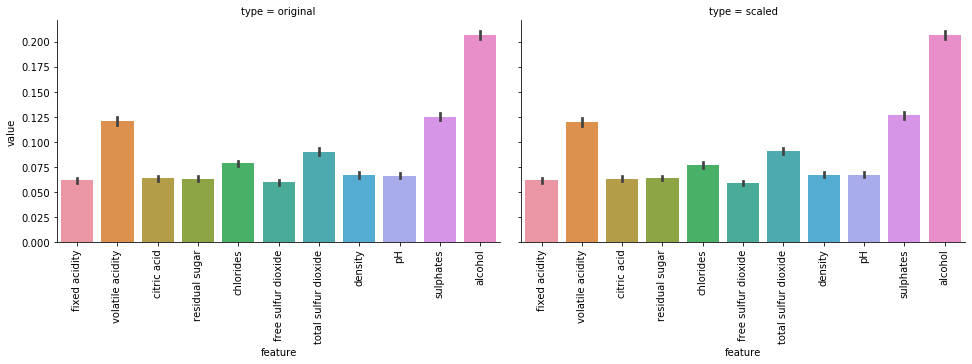

In [58]:
plot = sns.catplot(x="feature", y="value", col="type",
                 data=Bootstrap_importance_df, kind="bar",
                 height=4, aspect=1.7);

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in plot.axes.flat]

# Show graphic
plt.show()

This approach reveals the same as the previous methods. But it shows that `chlorides` is also a bit above the other features. This is insightful, in the sense that these 5 features might be all it takes to make robust estimates of the wine quality.

# Transform features

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Previously, I did a `MinMax` scaling transformation. But there are many other transformations that can be done. A list of them are:
* Log Transformation
* Normalization
* Qunatile Transformation
* DecisionTree categorizing (Class creation)
* FeatureTools MultiplyNumeric, AddNumeric, etc. Will have to explore more. https://primitives.featurelabs.com/


# Save Prepared Data

https://www.kaggle.com/ryanholbrook/mutual-information

https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

https://stackoverflow.com/questions/52418152/featuretools-can-it-be-applied-on-a-single-table-to-generate-features-even-whens

https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568

In [59]:
dfPrepare.to_csv('../output/dataPrepared.csv', index_label = 'idx')